In [33]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

In [34]:
data = load_iris()

In [35]:
df = pd.DataFrame(data = data.data,columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
df['target'] = data.target

In [37]:
df.dropna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [38]:
y = df['target']
x = df.drop(columns = ['target'])

In [39]:
display(x)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [41]:
#Processo de padronização
df2 = scaler.fit_transform(x)

In [42]:
#Pre processamento
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, shuffle= True, random_state=32)

In [43]:
#Importando o modelo de arvore de decisão
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [44]:
#Fazendo fit com os dados de treino
clf1= clf.fit(x_train, y_train)

In [45]:
y_pred = clf1.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [47]:
relatorio = classification_report(y_test, y_pred)
print(relatorio)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.92      1.00      0.96        12
           2       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [48]:
#criar dataframe com valores previstos e corretos
df_1 = pd.DataFrame({"Previsto": y_pred, "Correto": y_test})

In [49]:
df_1["Flor_prevista"] = df_1["Previsto"].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
df_1["Flor_correta"] = df_1["Correto"].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [50]:
print(df_1.loc[df_1["Previsto"]==df_1["Correto"]])

     Previsto  Correto Flor_prevista Flor_correta
55          1        1    versicolor   versicolor
22          0        0        setosa       setosa
26          0        0        setosa       setosa
56          1        1    versicolor   versicolor
134         2        2     virginica    virginica
131         2        2     virginica    virginica
23          0        0        setosa       setosa
34          0        0        setosa       setosa
85          1        1    versicolor   versicolor
21          0        0        setosa       setosa
76          1        1    versicolor   versicolor
115         2        2     virginica    virginica
60          1        1    versicolor   versicolor
67          1        1    versicolor   versicolor
147         2        2     virginica    virginica
113         2        2     virginica    virginica
66          1        1    versicolor   versicolor
123         2        2     virginica    virginica
69          1        1    versicolor   versicolor


In [51]:
#mostrar a importancia das variaveis para a classificação
feature_importances = clf1.feature_importances_


In [52]:
if len(data.feature_names)==len(feature_importances):
    importance_df = pd.DataFrame({'Features':data.feature_names, 'Importance': feature_importances})
    print(importance_df)
else:
    print("erro")

            Features  Importance
0  sepal length (cm)    0.014336
1   sepal width (cm)    0.000000
2  petal length (cm)    0.073801
3   petal width (cm)    0.911863


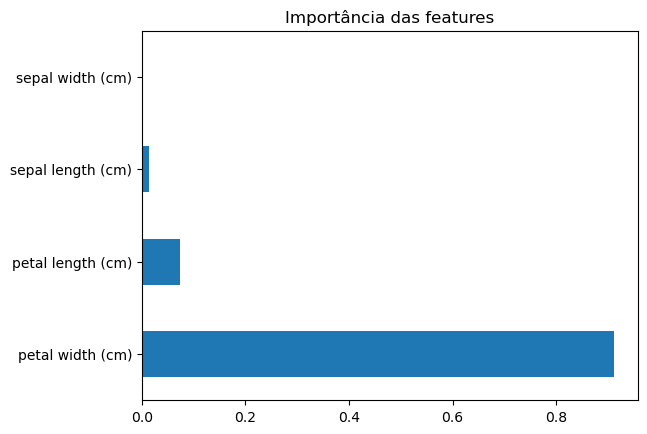

In [53]:
import matplotlib.pyplot as plt
#visualizando a importância das features para a classificação
importancias= pd.Series(clf1.feature_importances_,index = x.columns)
importancias.nlargest(4).plot(kind = 'barh')
plt.title("Importância das features para a classificação")
plt.show()